## Quora Question Pairs
Ülesanne on luua mudel, mis vaataks, kas kaks Quorasse postitatud küsimust on sama sisuga. 
https://www.kaggle.com/competitions/quora-question-pairs/overview 


In [136]:
# teekide importimine
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
andmed = pd.read_csv('train.csv')

In [8]:
andmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Andmestiku töötlemine

In [8]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [13]:
def preprocess(text):
    if isinstance(text, str):
        text = text.lower().replace('[^\w\s]', '')
        words = [ps.stem(word) for word in text.split() if word not in stop_words]
        text = ' '.join(words)
    return text

In [27]:
andmed['question1'] = andmed['question1'].apply(preprocess)

In [28]:
andmed['question2'] = andmed['question2'].apply(preprocess)

In [32]:
andmed = andmed.dropna(axis="rows")

In [142]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(andmed['question1'] + andmed['question2'])

Mudeli treenimine

In [143]:
y_train = andmed['is_duplicate']

model1 = LogisticRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testimine

In [107]:
test_andmed = pd.read_csv("test.csv")

<ipython-input-107-9b7117f5f757>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_andmed = pd.read_csv("test.csv")


In [114]:
test_andmed['test_id'] = pd.to_numeric(test_andmed['test_id'], errors='coerce')

In [117]:
test_andmed = test_andmed[test_andmed['test_id'].notnull() & (test_andmed['test_id'] % 1 == 0)]

In [108]:
test_andmed = test_andmed[pd.to_numeric(test_andmed['test_id'], errors='coerce').notnull()]

In [119]:
test_andmed = test_andmed.drop_duplicates()

In [ ]:
test_andmed['question1'] = test_andmed['question1'].apply(preprocess)
test_andmed['question2'] = test_andmed['question2'].apply(preprocess)

In [ ]:
test_andmed['question1'] = test_andmed['question1'].fillna('')
test_andmed['question2'] = test_andmed['question2'].fillna('')

In [125]:
X = vectorizer.transform(test_andmed['question1'] + test_andmed['question2'])

Andmete faili kirjutamine ja ennustamine

In [77]:
predictions = pd.DataFrame()
predictions['test_id'] = test_andmed['test_id']

In [ ]:
test_andmed['is_duplicate'] = model1.predict(X)
predictions = test_andmed[['test_id', 'is_duplicate']]
predictions.to_csv("test_predictions.csv", index=False)

Täpsus lisaks

In [144]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
y_pred = model2.predict(X_val)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     51026
           1       0.68      0.59      0.63     29832

    accuracy                           0.75     80858
   macro avg       0.73      0.72      0.72     80858
weighted avg       0.74      0.75      0.74     80858



Ma tegin kogemata ülesande, mille tähtaeg on juba möödas, aga ma loodan, et sellest pole hullu. Mingit sellist score näitab Kaggle, täpselt ei oska seda küll tõlgendada. 
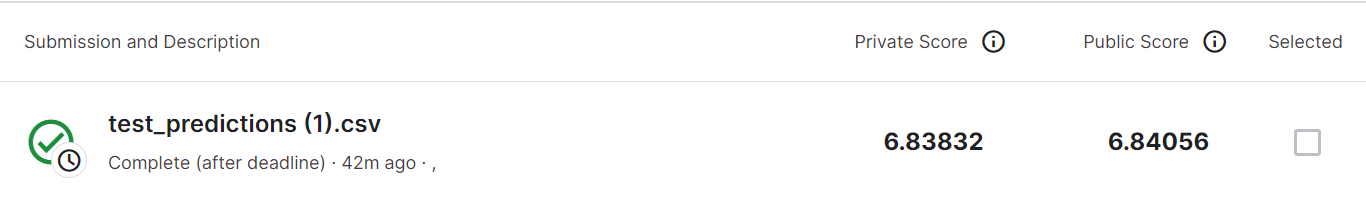